<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/convolutional_neural_network(Anaconda_dog_cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# video 360 in udemy> machin learning  teach about Anaconda and install jupyter and anaconda and python. https://www.udemy.com/course/machinelearning/learn/lecture/20081292#overview


# Convolutional Neural Network

https://www.superdatascience.com/blogs/the-ultimate-guide-to-convolutional-neural-networks-cnn

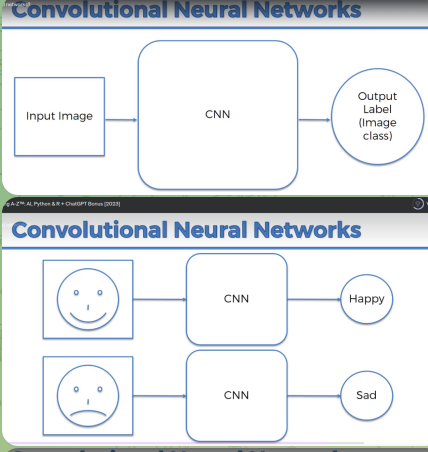

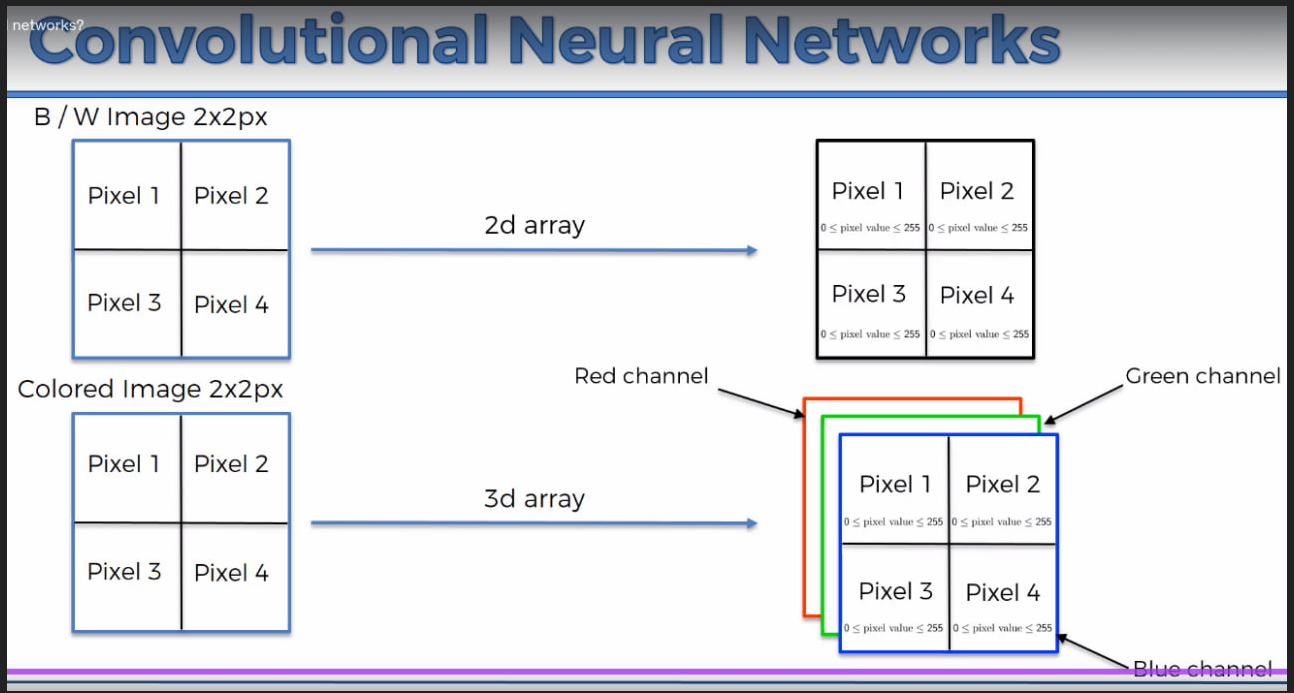

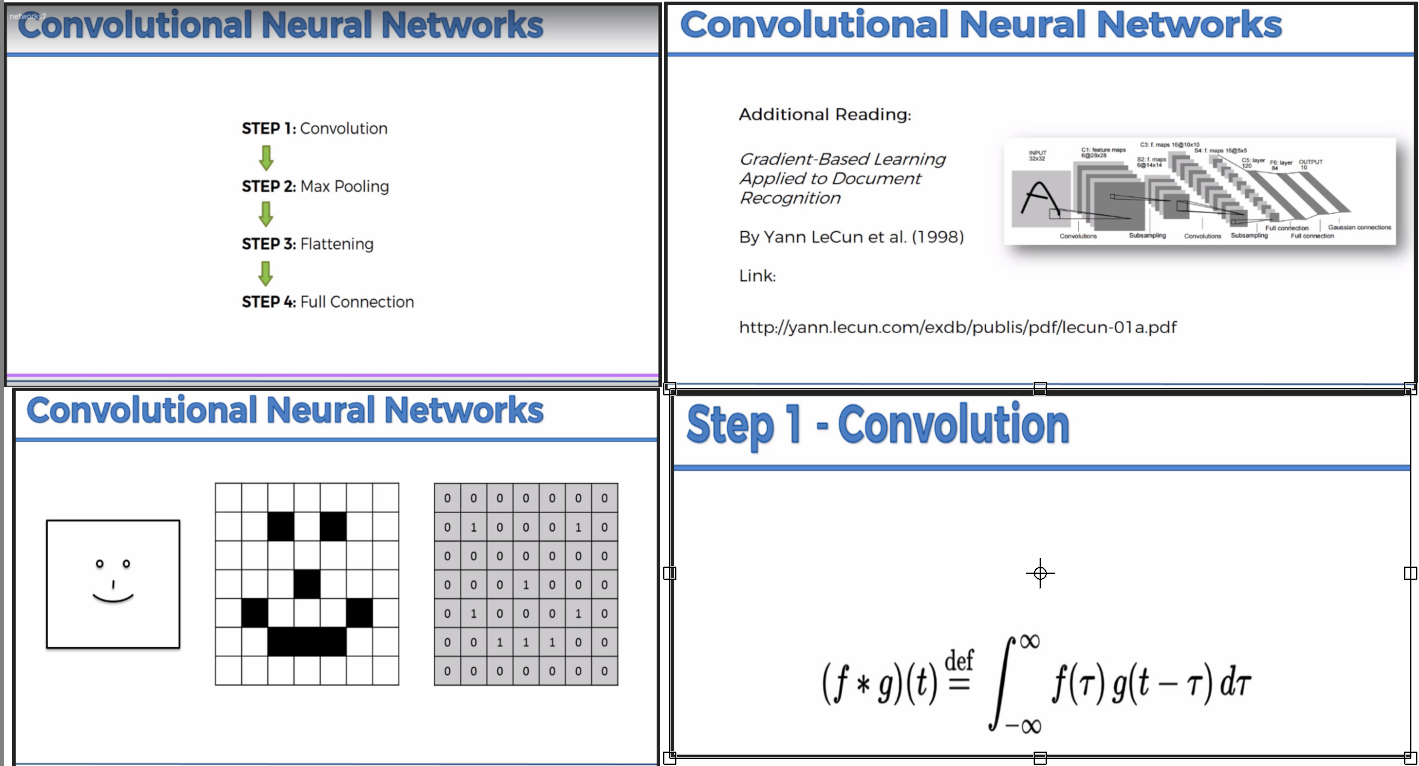

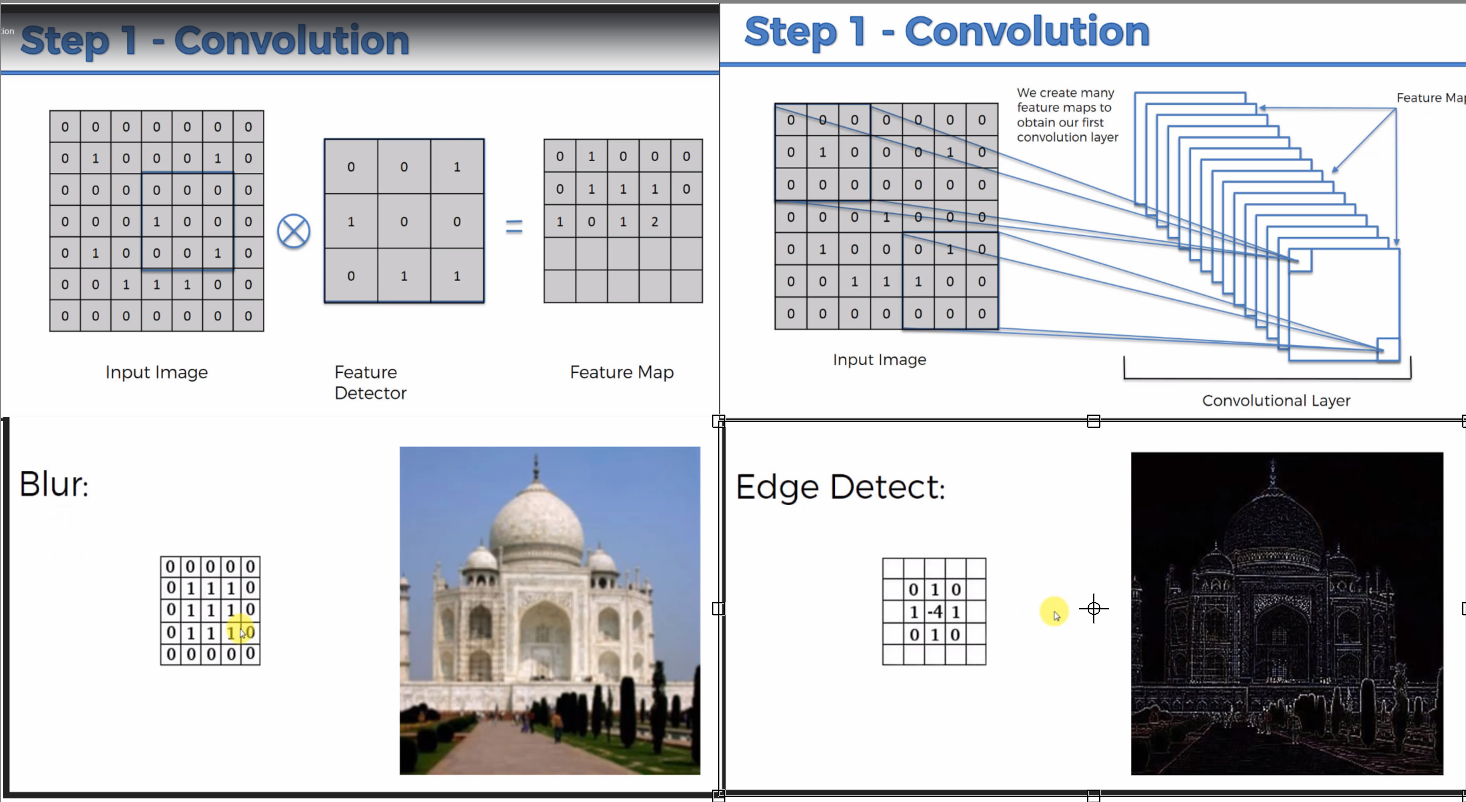

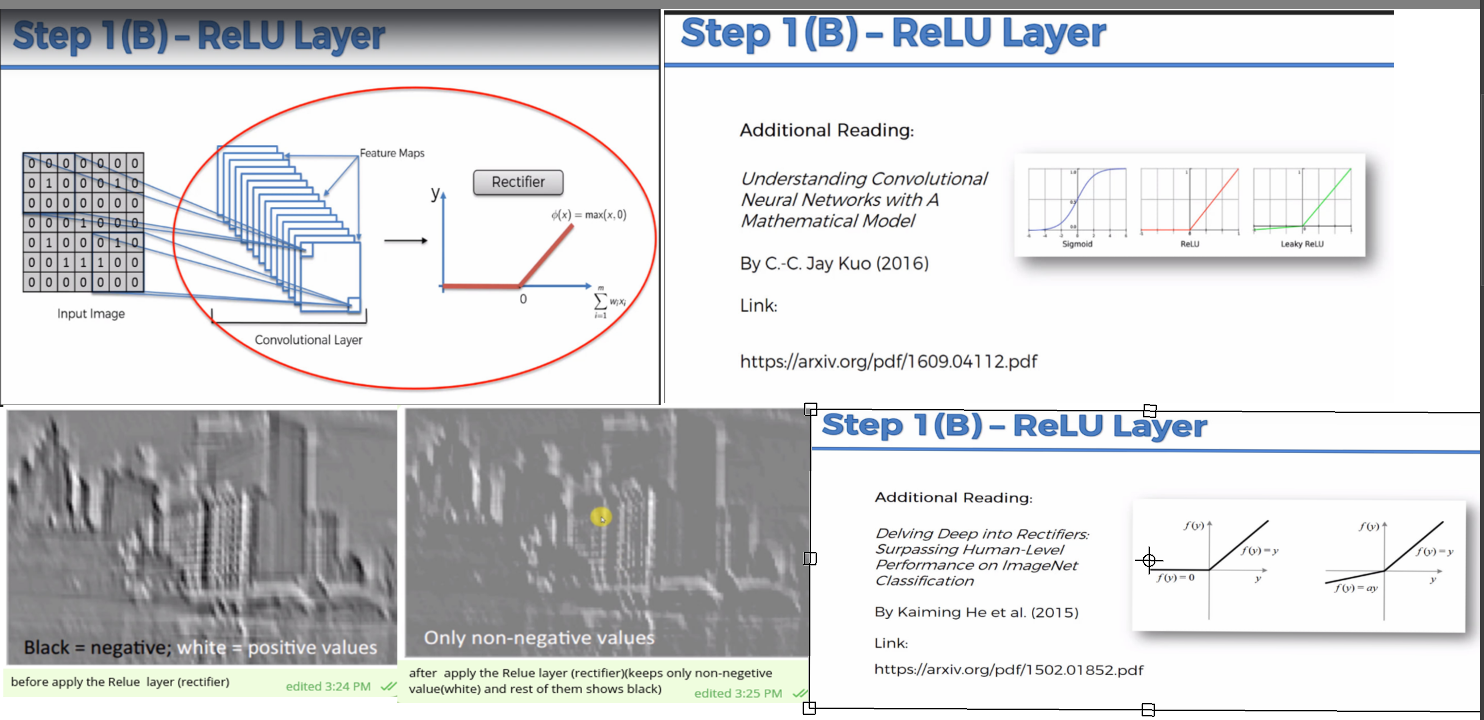

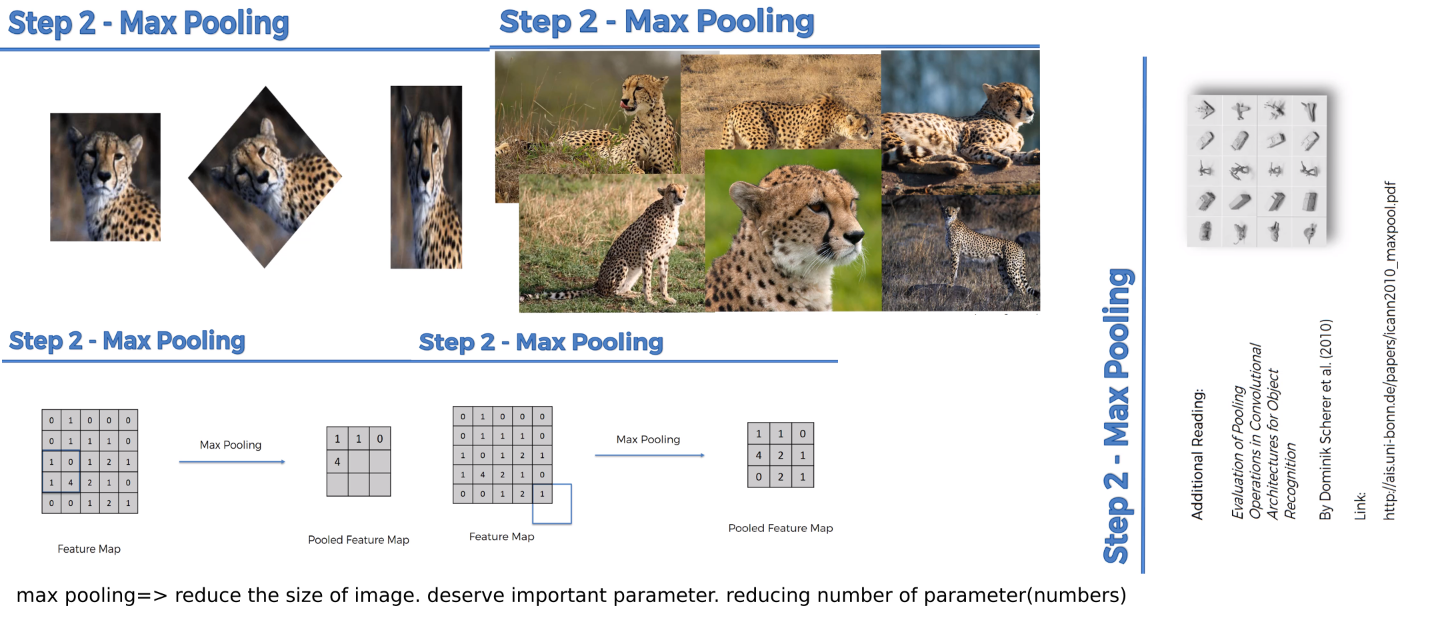

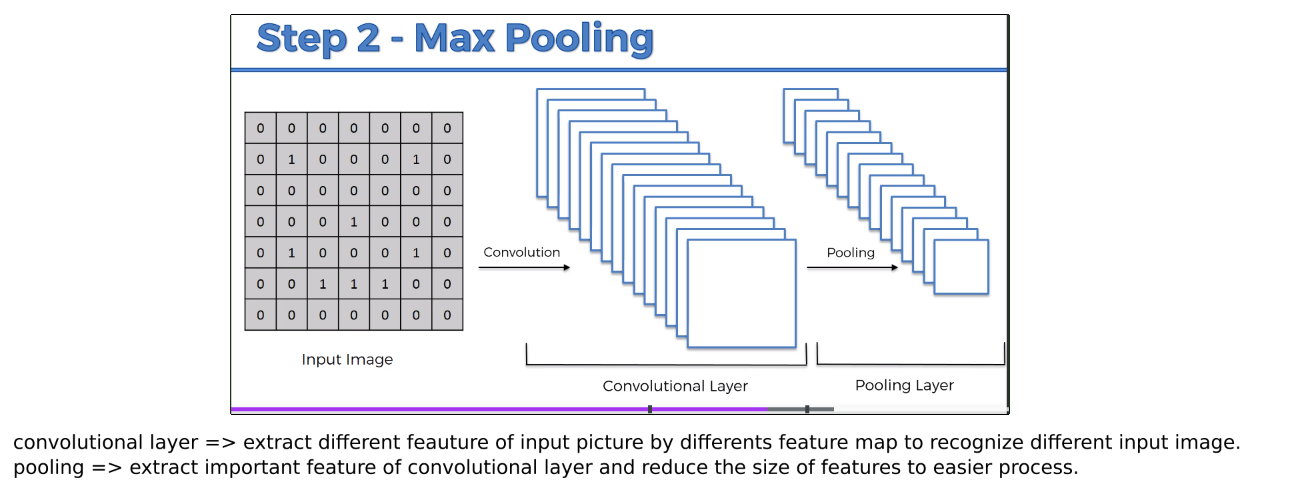

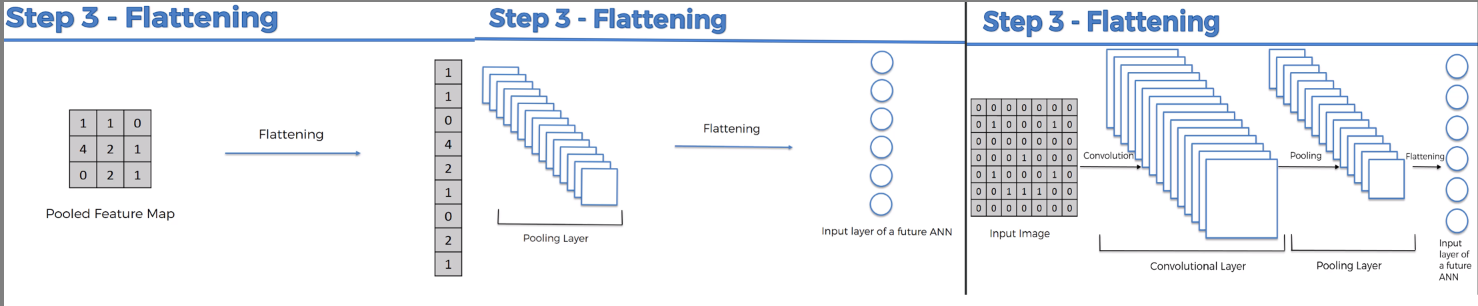

in Artificial Neural Network (ANN) we used of just Hidden layer but they are NOT Fully Connected but in CNN we use of Fully connected layer as a Hidden Layer to combine all the features to predict better.

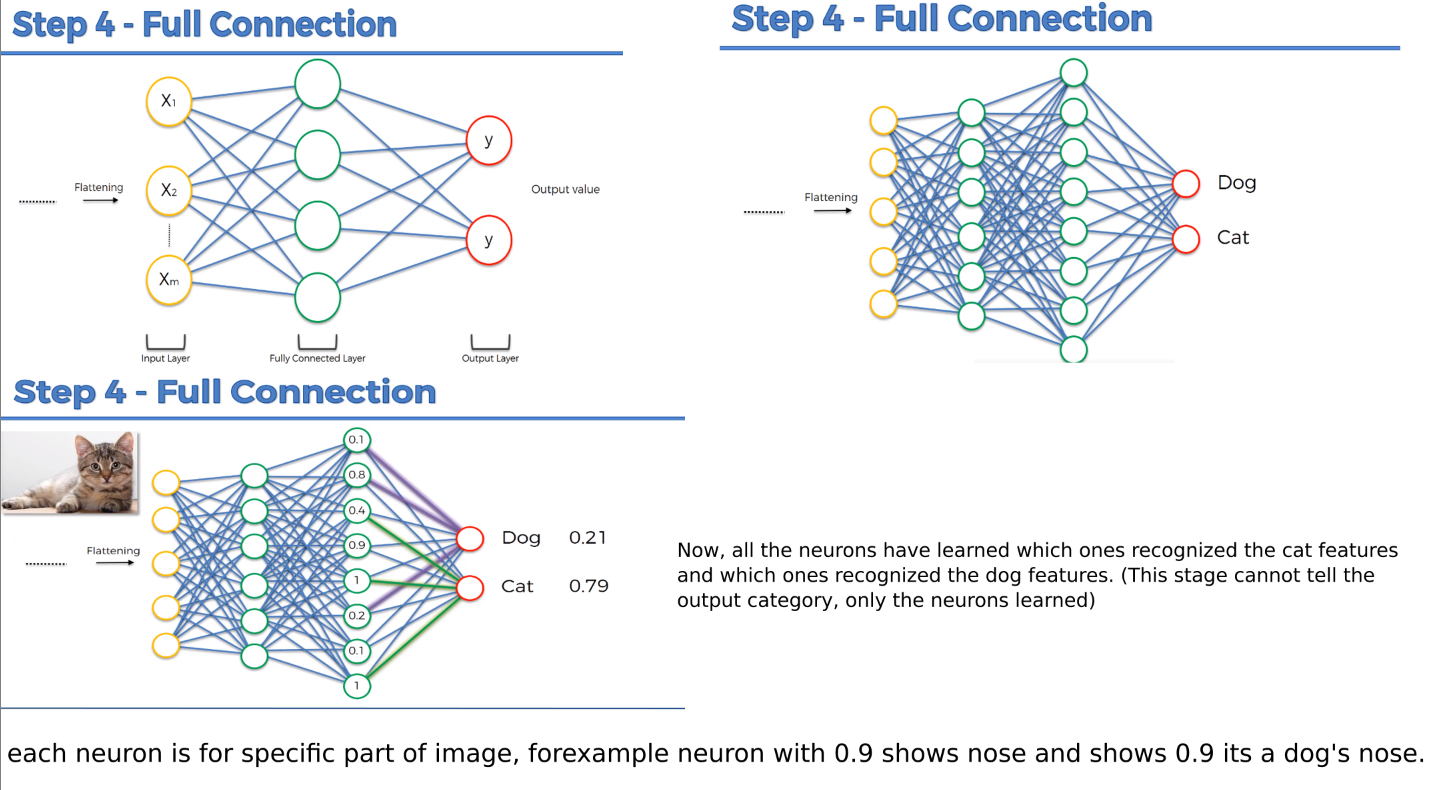

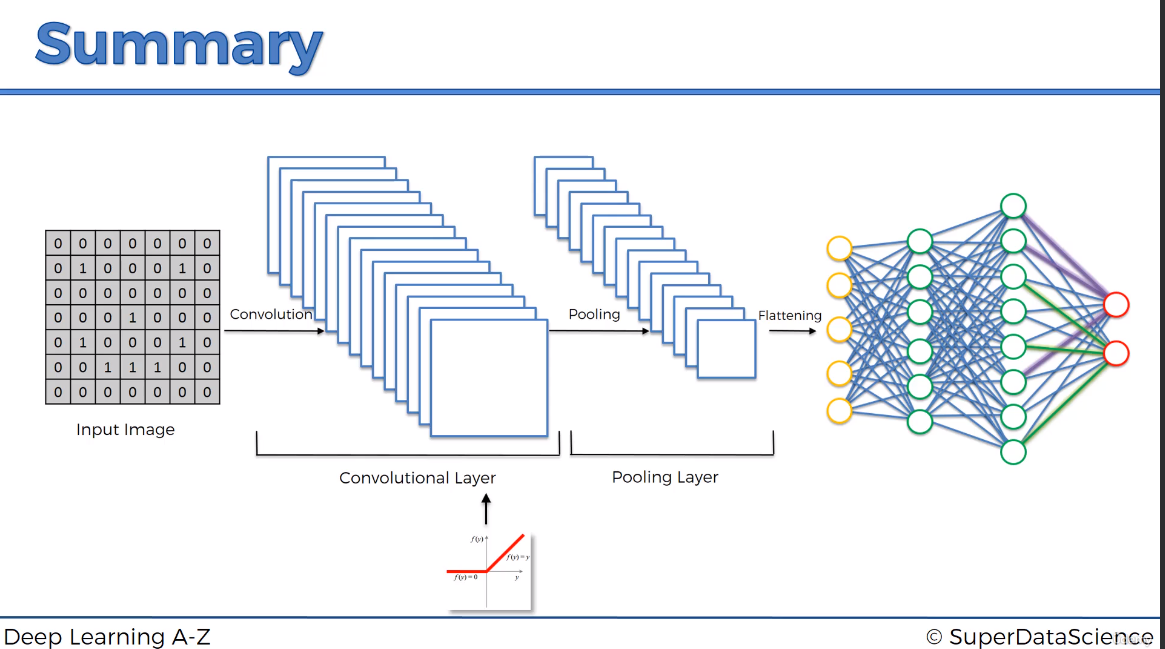

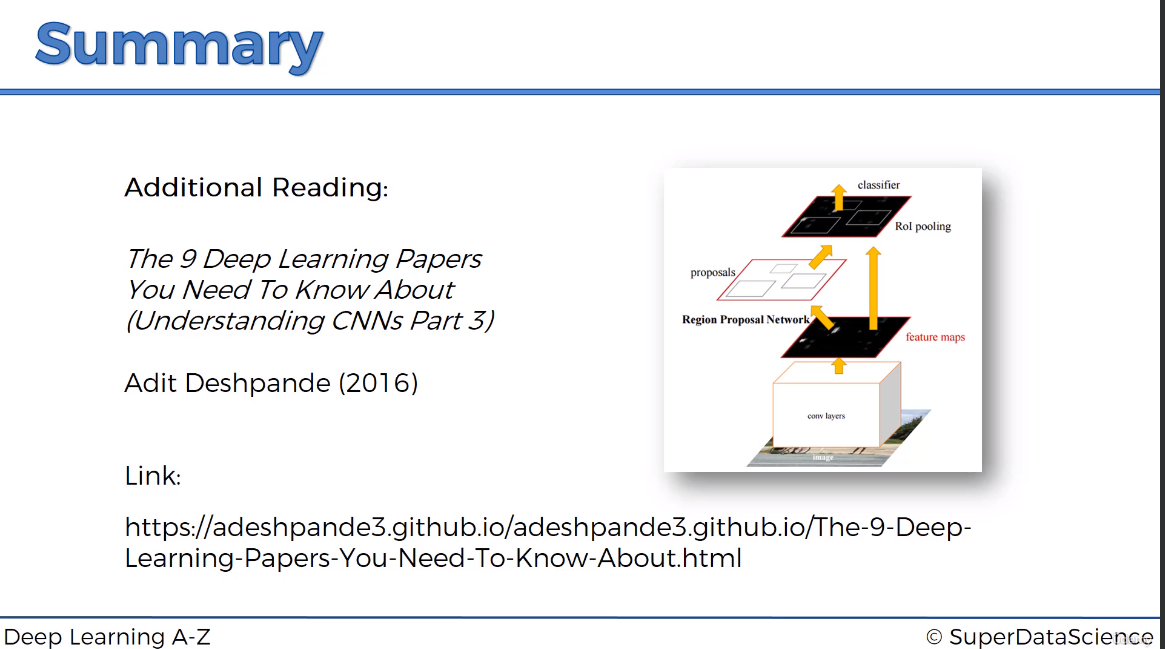



```
Sigmoid=> used for binary classification  
 Softmax => otherwise for MultiClass classification we must use of Softmax
```



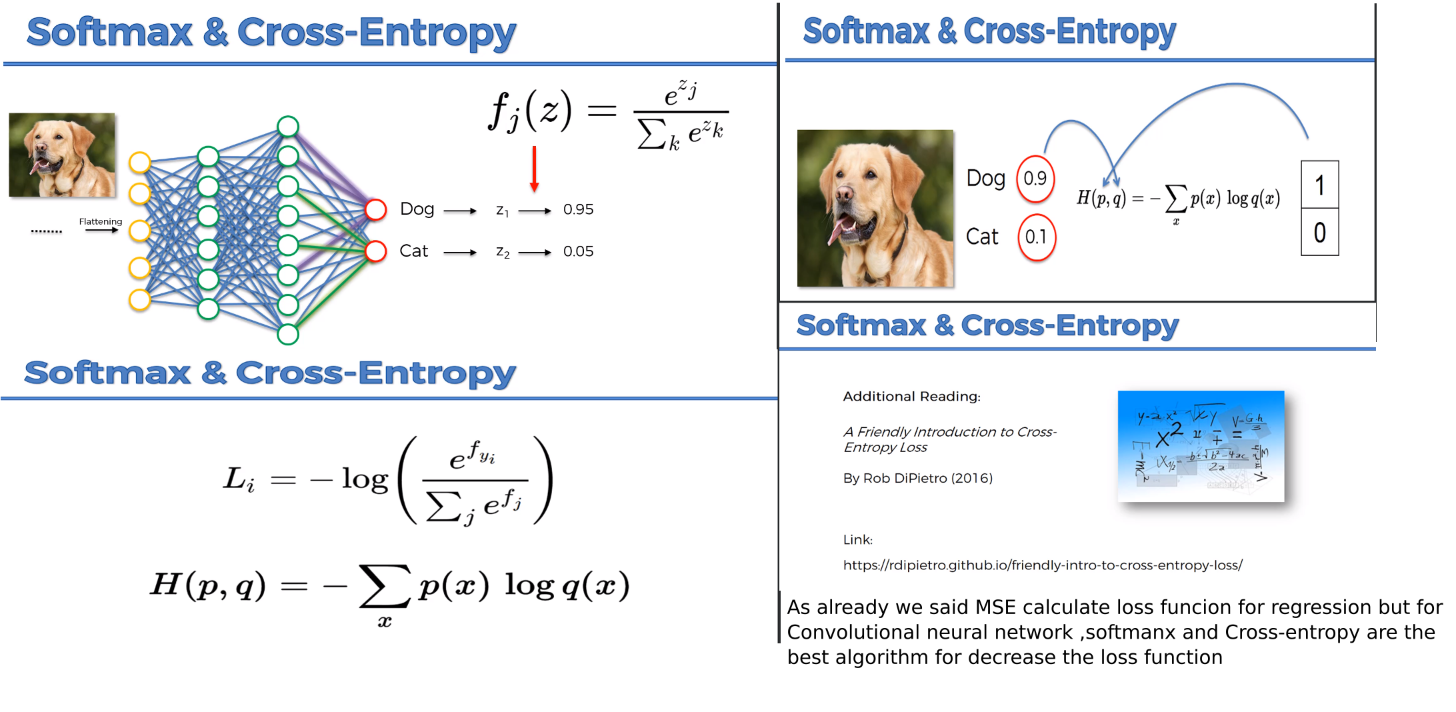

### Importing the libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator  #Kears use for preprocessing (of CNN) and create sequentioal layers


In [4]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing


```
https://keras.io/api/layers/preprocessing_layers/

https://keras.io/ja/preprocessing/image/
```



### Preprocessing the Training set



```
We must perform transformations or image augmentation(rotate,zoom,..) on the training set to avoid overfitting.
 This is evident when there's a significant difference between the accuracy
  of the training set and the test set. For instance, if the accuracy for
  the training set is 98% and for the test set it's 40%, it suggests
   overfitting has occurred because the model hasn't generalized well to new
   data.
```



In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                       #define some change on images
training_set = train_datagen.flow_from_directory('dataset/training_set',         #Apply changes on Training_set images  folder
                                                 target_size = (64, 64),         #64*64 is a good size to help speed up the machine for quick training
                                                 batch_size = 32,                #how many image in each batch
                                                 class_mode = 'binary')          #here just we have 2 categorical data(dog and cat) if we have more than 2 category we must use "categorical" instead of "binary"

### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)                    #the scale of test_set mut be the same as the scale of train_set
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn=tf.keras.models.Sequential()

### Step 1 - Convolution


```
filters=> number of feature that we want
kernel_size=> size of filter (forexample 3*3)
activation=> define Relue to convert images to black and white to specified the inportant features
input_shape=> (64*64*3) we have RGB color images with 3 channels, and we deffineed 64*64 in preprocessing part
```

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling


```
pool_size=> due to the square shape of pooling just we write 2 it means 2*2  , it means get maxinum number of 4 different numbers
stride=> which number of pixel must pooling frame ,shift.
padding=> is default value that is 0 around the images
```



In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer



```
i the second conv layer we mustn't  define the input_image_size because  automotically this layer connect to previuse layer
```





In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))     #units=> number of hidden Neuron. if we use larg number of neuron(128) it give me  best accuracy

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))    #units=1  => number of output neuron layer   Sigmoid=> used for binary classification  otherwise for MultiClass classification we must use of Softmax

## Part 3 - Training the CNN

### Compiling the CNN


```
optimizer=> use Adam for stochastic gradiant to avoid of local minimum and reduce the loss error between prediction value and real value
loss => use binary_crossentropy for CNN with  birany classification for dog and cat
metrics=> give me accuracy
```



In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set


```
in this step we want to apply DL model on training_set data and at the same time we must validate on the test_set by Validation_data
we use epoch =25 to converge accuracy more
```



In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64)) #we must change the size of image base on input-size of model that we defined for training
test_image = image.img_to_array(test_image)                                                       #predict method need 2d array, so we must convert image with PIL format  to 2d array by numpy
test_image = np.expand_dims(test_image, axis = 0)                                                 #as in the training part we defined batch_size  we add third dimention(1 and second dimenstion were size of input_image) to the data in training part , so we must make third part instead of batch_siz,even if we have 1 image or more. the dimension of batch_size ALWAYS is in the first dimension(0)
result = cnn.predict(test_image)                                                                  #predict the image
training_set.class_indices                                                                        # the trick that we know which number is correspond to which class is this command, forexample dog is correspond to 0 and cat is 1
if result[0][0] == 1:                                                                             #the first dim [0] is for batch_size  and the second dim [0] is for predicted images
  prediction = 'dog'
else:
  prediction = 'cat'

In [ ]:
print(prediction)